<a href="https://colab.research.google.com/github/dsreliete/Womakerscode_DA_colab_desafio_individual/blob/main/Desafio3ElietedaSilva_Rodrigues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat
### pacote com visualizacoes de dados faltantes
import missingno as msno

In [65]:
url = "https://raw.githubusercontent.com/dsreliete/Womakerscode_DA_colab_desafio_individual/main/enem_2023.json"

df = pd.read_json(url)
df

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


In [67]:
df_enem_desc = df.describe()
df_enem_desc

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [68]:
def describe_amplitude(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    return df1

# 1. Qual das disciplinas tem a maior amplitude de nota?
df_enem_desc = describe_amplitude(df)
df_enem_desc.loc['amplitude'].sort_values(ascending=False)
print(f'A disciplina com a maior amplitude de nota é {df_enem_desc.loc["amplitude"].idxmax()}')

A disciplina com a maior amplitude de nota é Redação


In [69]:
df.isna().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


In [70]:
df_new = df.copy()

In [71]:
# 2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)
df_mean = df_new[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
df_median = df_new[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median(skipna=True)
df_mean_median = pd.concat([df_mean, df_median], axis=1)
df_mean_median.columns = ['Média', 'Mediana']
df_mean_median

,Média,Mediana
Linguagens,514.524809,515.045250
Ciências humanas,527.042281,524.519920
Ciências da natureza,499.315583,500.479263
Matemática,535.965660,533.247767
Redação,637.783532,635.273973


In [72]:
# 3. ConsiderandoocursodeCiênciadaComputaçãodaUFPE,onde o peso cada uma das disciplinas ponderado:
# a. Redação-2
# b. MatemáticaesuasTecnologias-4
# c. Linguagens,CódigosesuasTecnologias-2
# d. CiênciasHumanasesuasTecnologias-1
# e. CiênciasdaNaturezaesuasTecnologias-1
# Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

red = df.loc[:, 'Redação'].fillna(0).apply(lambda x: x * 2)
mat = df.loc[:,'Matemática'].fillna(0).apply(lambda x: x * 4)
ling = df.loc[:,'Linguagens'].fillna(0).apply(lambda x: x * 2)
cihu = df.loc[:,'Ciências humanas'].fillna(0).apply(lambda x: x * 1)
cina = df.loc[:,'Ciências da natureza'].fillna(0).apply(lambda x: x * 1)

df_todas_notas = pd.concat([red, mat, ling, cihu, cina], axis=1)
df_todas_notas.columns = ['Redação', 'Matemática', 'Linguagens', 'Ciências humanas', 'Ciências da natureza']

df_nota_final = df_todas_notas.sum(axis=1)/5
df_nota_final.name = 'Nota final'
df_todas_notas = pd.concat([df_todas_notas, df_nota_final], axis=1)
df_todas_notas.sort_values(by='Nota final', ascending=False, inplace=True)
df_500 = df_todas_notas.head(500)
df_500.describe().loc[['mean', 'std']]


,Redação,Matemática,Linguagens,Ciências humanas,Ciências da natureza,Nota final
mean,1336.943185,2258.460105,1045.648803,516.857900,460.881071,1123.758213
std,226.536677,311.246084,189.956466,116.877733,162.856492,71.988533


In [73]:
# 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

df_40 = df_todas_notas.head(40)
df_40.describe().loc[['mean', 'std']]

,Redação,Matemática,Linguagens,Ciências humanas,Ciências da natureza,Nota final
mean,1495.045186,2622.603326,1172.553211,554.327484,522.298209,1273.365483
std,210.050262,319.983127,205.286797,80.066997,71.969522,34.395785


In [74]:
# 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

mat = df.loc[:,'Matemática'].fillna(0)
ling = df.loc[:,'Linguagens'].fillna(0)

q3_mat = mat.quantile(0.75)
q3_ling = ling.quantile(0.75)

print(f'O teto do terceiro quartil para as disciplinas de matemática é {q3_mat}')
print(f'O teto do terceiro quartil para as disciplinas de linguagens é {q3_ling}')

O teto do terceiro quartil para as disciplinas de matemática é 586.927627444125
O teto do terceiro quartil para as disciplinas de linguagens é 564.793722193875


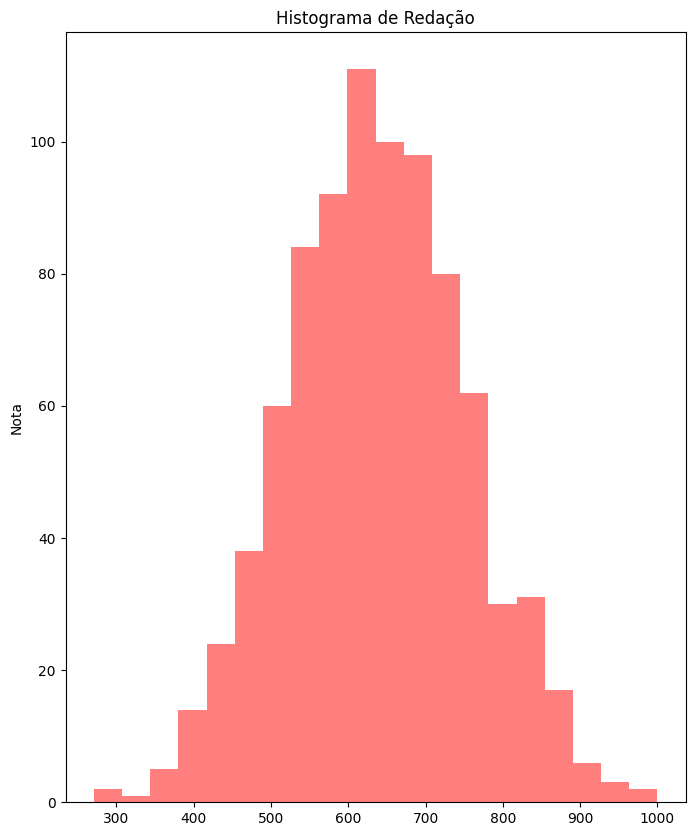

A classificação do histograma de notas da área de Redação é SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico


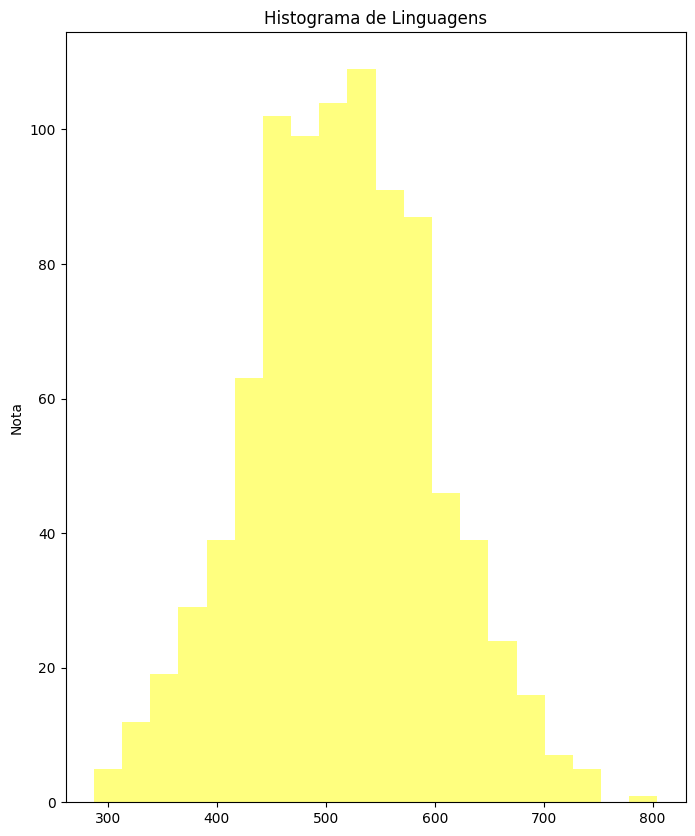

In [90]:
# 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df['Redação'], bins=20, color='red', alpha=0.5, label='Redação')
plt.title('Histograma de Redação')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas da área de Redação é SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico')

plt.hist(df['Linguagens'], bins=20, color='yellow', alpha=0.5, label='Linguagens')
plt.title('Histograma de Linguagens')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas da área de Linguagens é SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico')





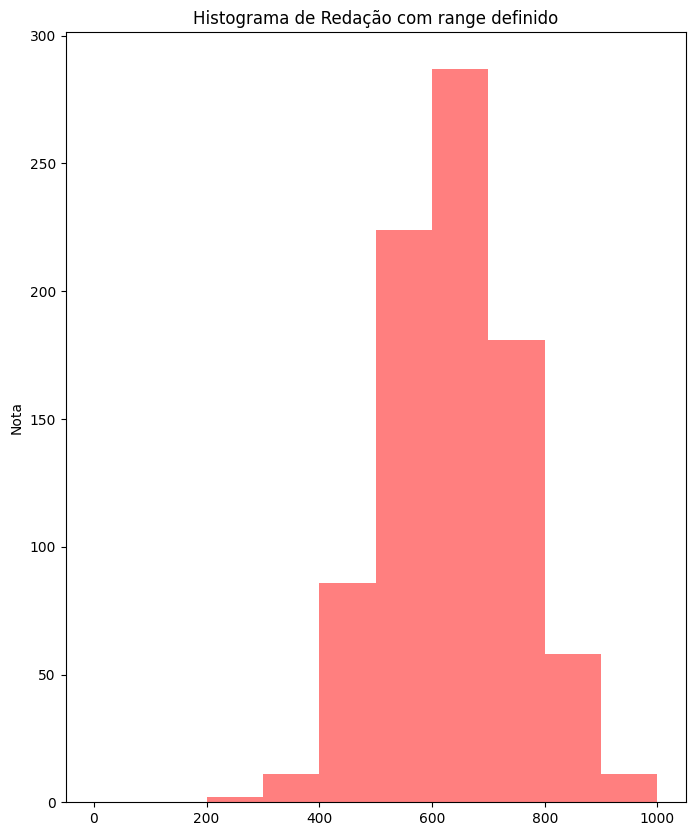

A classificação do histograma de notas da área de Linguagens continua SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico


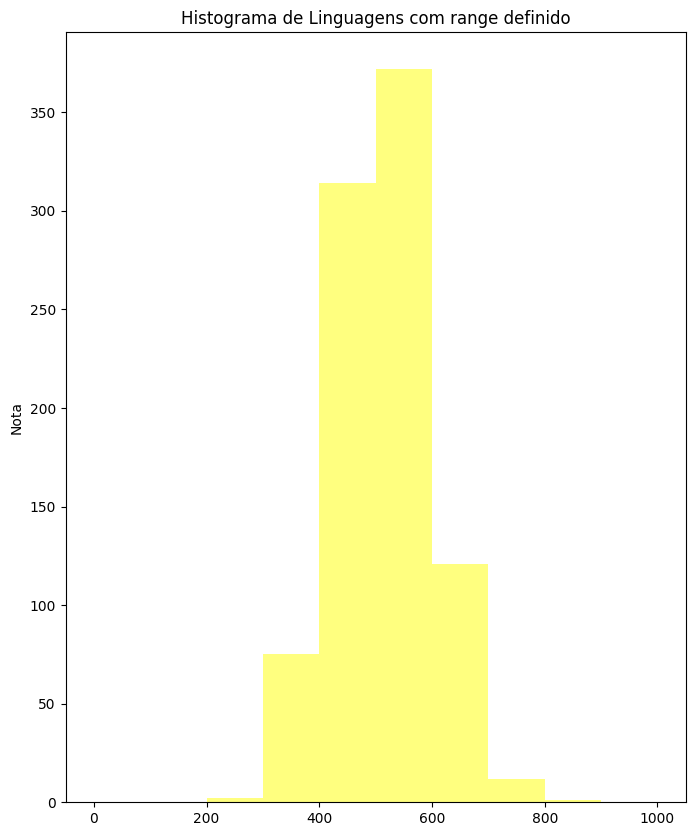

A classificação do histograma de notas da área de Linguagens continua SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico


In [95]:
# 7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df['Redação'], range=[0,1000], color='red', alpha=0.5, label='Redação')
plt.title('Histograma de Redação com range definido')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas da área de Linguagens continua SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico')

plt.hist(df['Linguagens'], range=[0,1000], color='yellow', alpha=0.5, label='Linguagens')
plt.title('Histograma de Linguagens com range definido')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas da área de Linguagens continua SIMÉTRICO devido as notas estarem distribuídas no centro do gráfico')



In [ ]:
# 8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.


In [ ]:
# 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
# 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.